In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

pd.set_option("display.max_columns", 500)
plt.style.use("seaborn-colorblind")
pal = sns.color_palette()

In [7]:
df = pd.read_csv('Cleaned_train.csv')
df

,DepAirport,ArrAirport,AirlineCode,FlightNo,EDepTime,EArrTime,RDepTime,RArrTime,VehCode,Cancel,Sign,daydate,CCity,Longit,Lat,City,Weather,LTemp,HTemp,Special_Begin,Special_End,Special_Content,Delay_hours,Delay,TravelDis,Clock,Flight_Time,Temp_diff
0,HGH,DLC,CZ,CZ6328,26/1/16 12:00,26/1/16 14:05,26/1/16 12:58,26/1/16 14:43,1.0,Normal,NaN,26/1/16,杭州萧山,120.43,30.24,杭州,Clear to cloudy,1.0,7.0,NaN,NaN,NaN,0.966667,0,2.083333,12,Afternoon,6.0
1,SHA,XMN,FM,FM9261,14/1/16 8:40,14/1/16 10:25,14/1/16 9:10,14/1/16 10:39,2.0,Normal,NaN,14/1/16,上海虹桥,121.33,31.20,上海,Cloudy,3.0,6.0,NaN,NaN,NaN,0.500000,0,1.750000,8,Morning,3.0
2,CAN,WNZ,ZH,ZH9597,26/1/16 9:35,26/1/16 11:25,26/1/16 9:59,26/1/16 11:14,3.0,Normal,NaN,26/1/16,广州白云,113.30,23.39,广州,Light rain to moderate rain,6.0,11.0,NaN,NaN,NaN,0.400000,0,1.833333,9,Morning,5.0
3,SHA,ZUH,9C,9C8819,6/1/16 22:50,7/1/16 1:45,6/1/16 23:04,7/1/16 1:24,4.0,Normal,NaN,7/1/16,上海虹桥,121.33,31.20,上海,Cloudy to light rain,4.0,10.0,NaN,NaN,NaN,0.233333,0,2.916667,22,Evening,6.0
4,SHE,TAO,TZ,TZ185,10/1/16 4:10,10/1/16 6:20,10/1/16 4:25,10/1/16 5:39,5.0,Normal,NaN,10/1/16,沈阳桃仙,123.49,41.63,沈阳,Clear,-20.0,-7.0,NaN,NaN,NaN,0.250000,0,2.166667,4,Late_Evening,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,XNN,CKG,3U,3U8822,3/4/16 6:40,3/4/16 8:30,3/4/16 7:34,3/4/16 9:00,2317.0,Normal,NaN,3/4/16,西宁曹家堡,102.00,36.53,西宁,Cloudy,2.0,22.0,NaN,NaN,NaN,0.900000,0,1.833333,6,Late_Evening,20.0
1048571,TGO,HET,GS,GS6674,23/4/16 7:55,23/4/16 9:45,23/4/16 7:54,23/4/16 9:29,179.0,Normal,NaN,23/4/16,通辽,122.20,43.56,通辽,Clear,3.0,17.0,NaN,NaN,NaN,-0.016670,0,1.833333,7,Morning,14.0
1048572,PEK,SHE,CZ,CZ6102,2/4/16 2:40,2/4/16 4:10,2/4/16 3:16,2/4/16 4:12,1783.0,Normal,NaN,2/4/16,北京首都,116.60,40.08,北京,Cloudy to overcast,8.0,18.0,NaN,NaN,NaN,0.600000,0,1.500000,2,Late_Evening,10.0
1048573,SZX,CKG,9C,9C8613,12/4/16 22:25,13/4/16 0:35,12/4/16 22:57,13/4/16 0:47,604.0,Normal,NaN,13/4/16,深圳宝安,113.80,22.64,深圳,Thundershower to shower,22.0,25.0,13/4/16 7:30,13/4/16 12:00,目前深圳机场有小雷雨，期间进出港航班可能会受到影响。,0.533300,0,2.166667,22,Evening,3.0


# Understand the Delay_hours Variable

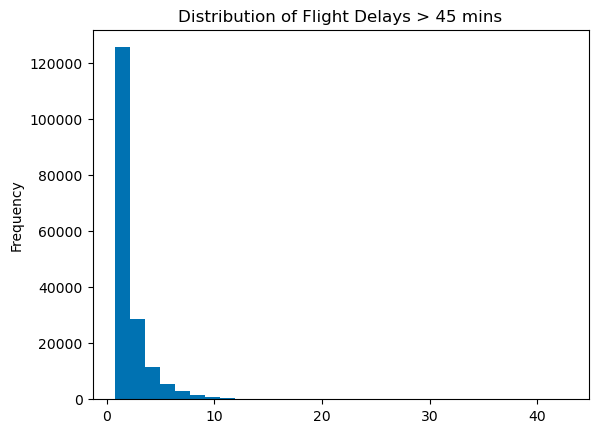

In [8]:
df.query("Delay_hours > 0.75 ")["Delay_hours"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays > 45 mins"
)
plt.show()

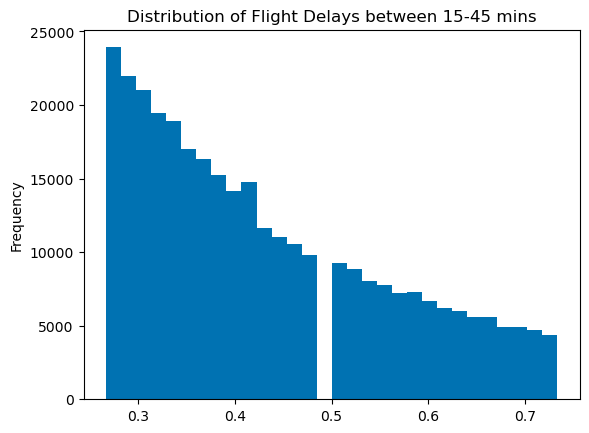

In [9]:
df.query("Delay_hours > 0.25 and Delay_hours < 0.75")["Delay_hours"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays between 15-45 mins"
)
plt.show()

# Grouping of Delays

Delays are divided into three categories, namely "on time or small delay" (up to 15 minutes delay), "Medium delay" (15 – 45 minutes delay) and "Large delay" ( 45 minutes delay).

In [35]:
df["DelayGroup"] = None
df.loc[df["Delay_hours"] == 0, "DelayGroup"] = "OnTime_Early"
df.loc[
    (df["Delay_hours"] > 0) & (df["Delay_hours"] <= 0.25), "DelayGroup"
] = "Small_Delay"
df.loc[
    (df["Delay_hours"] > 0.25) & (df["Delay_hours"] <= 0.75), "DelayGroup"
] = "Medium_Delay"

df.loc[df["Delay_hours"] > 0.75, "DelayGroup"] = "Large_Delay"

df.loc[df["Cancel"] == 'Cancel', "DelayGroup"] = "Cancelled"

In [79]:
#print (df)

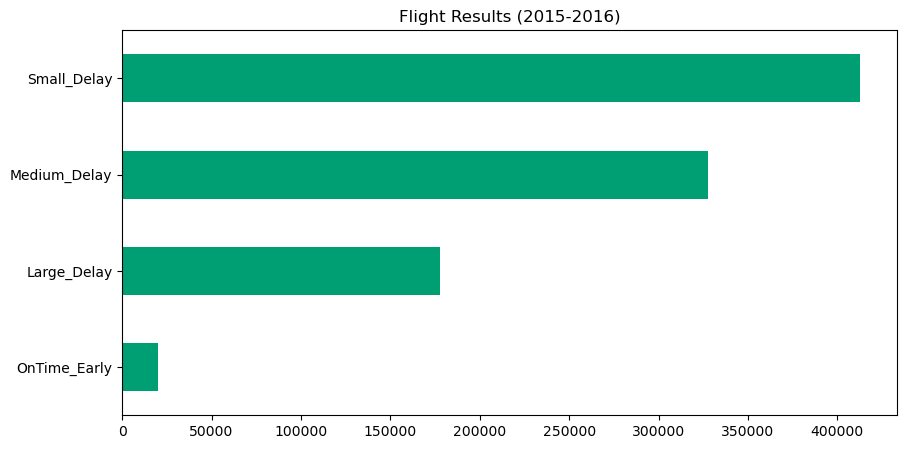

In [39]:
df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(10, 5), color=pal[1], title="Flight Results (2015-2016)"
)
plt.show()

# How Many Flights Per Year?

In [16]:
df['daydate'] = pd.to_datetime(df['daydate'])

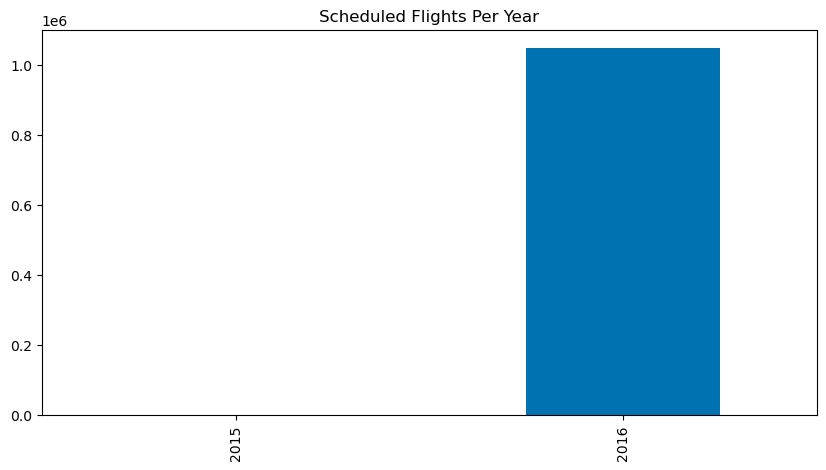

In [17]:
df["Year"] = df['daydate'].dt.year
df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year"
)
plt.show()

# What is the % of Flight Results by Year

In [18]:
df["Year"] = df["daydate"].dt.year
df_agg = df.groupby("Year")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay"]
df_agg[col_order].style.background_gradient(cmap="Greens")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay
Year,,,,
2015,1.818182,30.909091,30.909091,36.363636
2016,2.131797,43.990154,34.930254,18.947795


# Results by Month

In [19]:
df["Month"] = df["daydate"].dt.month
df_agg = df.groupby("Month")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay"]
df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay
Month,,,,
1,1.594992,37.982736,37.545587,22.876685
2,1.957304,43.918299,37.173579,16.950818
3,2.409556,45.773130,32.998951,18.818363
4,2.167433,42.657557,33.805049,21.369962
5,2.261148,47.953645,34.606547,15.178661
6,2.249523,46.593914,34.479296,16.677267
7,2.721512,48.456101,32.273543,16.548844
8,2.536062,48.692399,32.504766,16.266772
9,2.667444,50.772538,29.607900,16.952117


In [20]:
!pip install calmap plotly_calplot -q

# Compare Airlines

Text(0.5, 0, 'Flights (100k)')

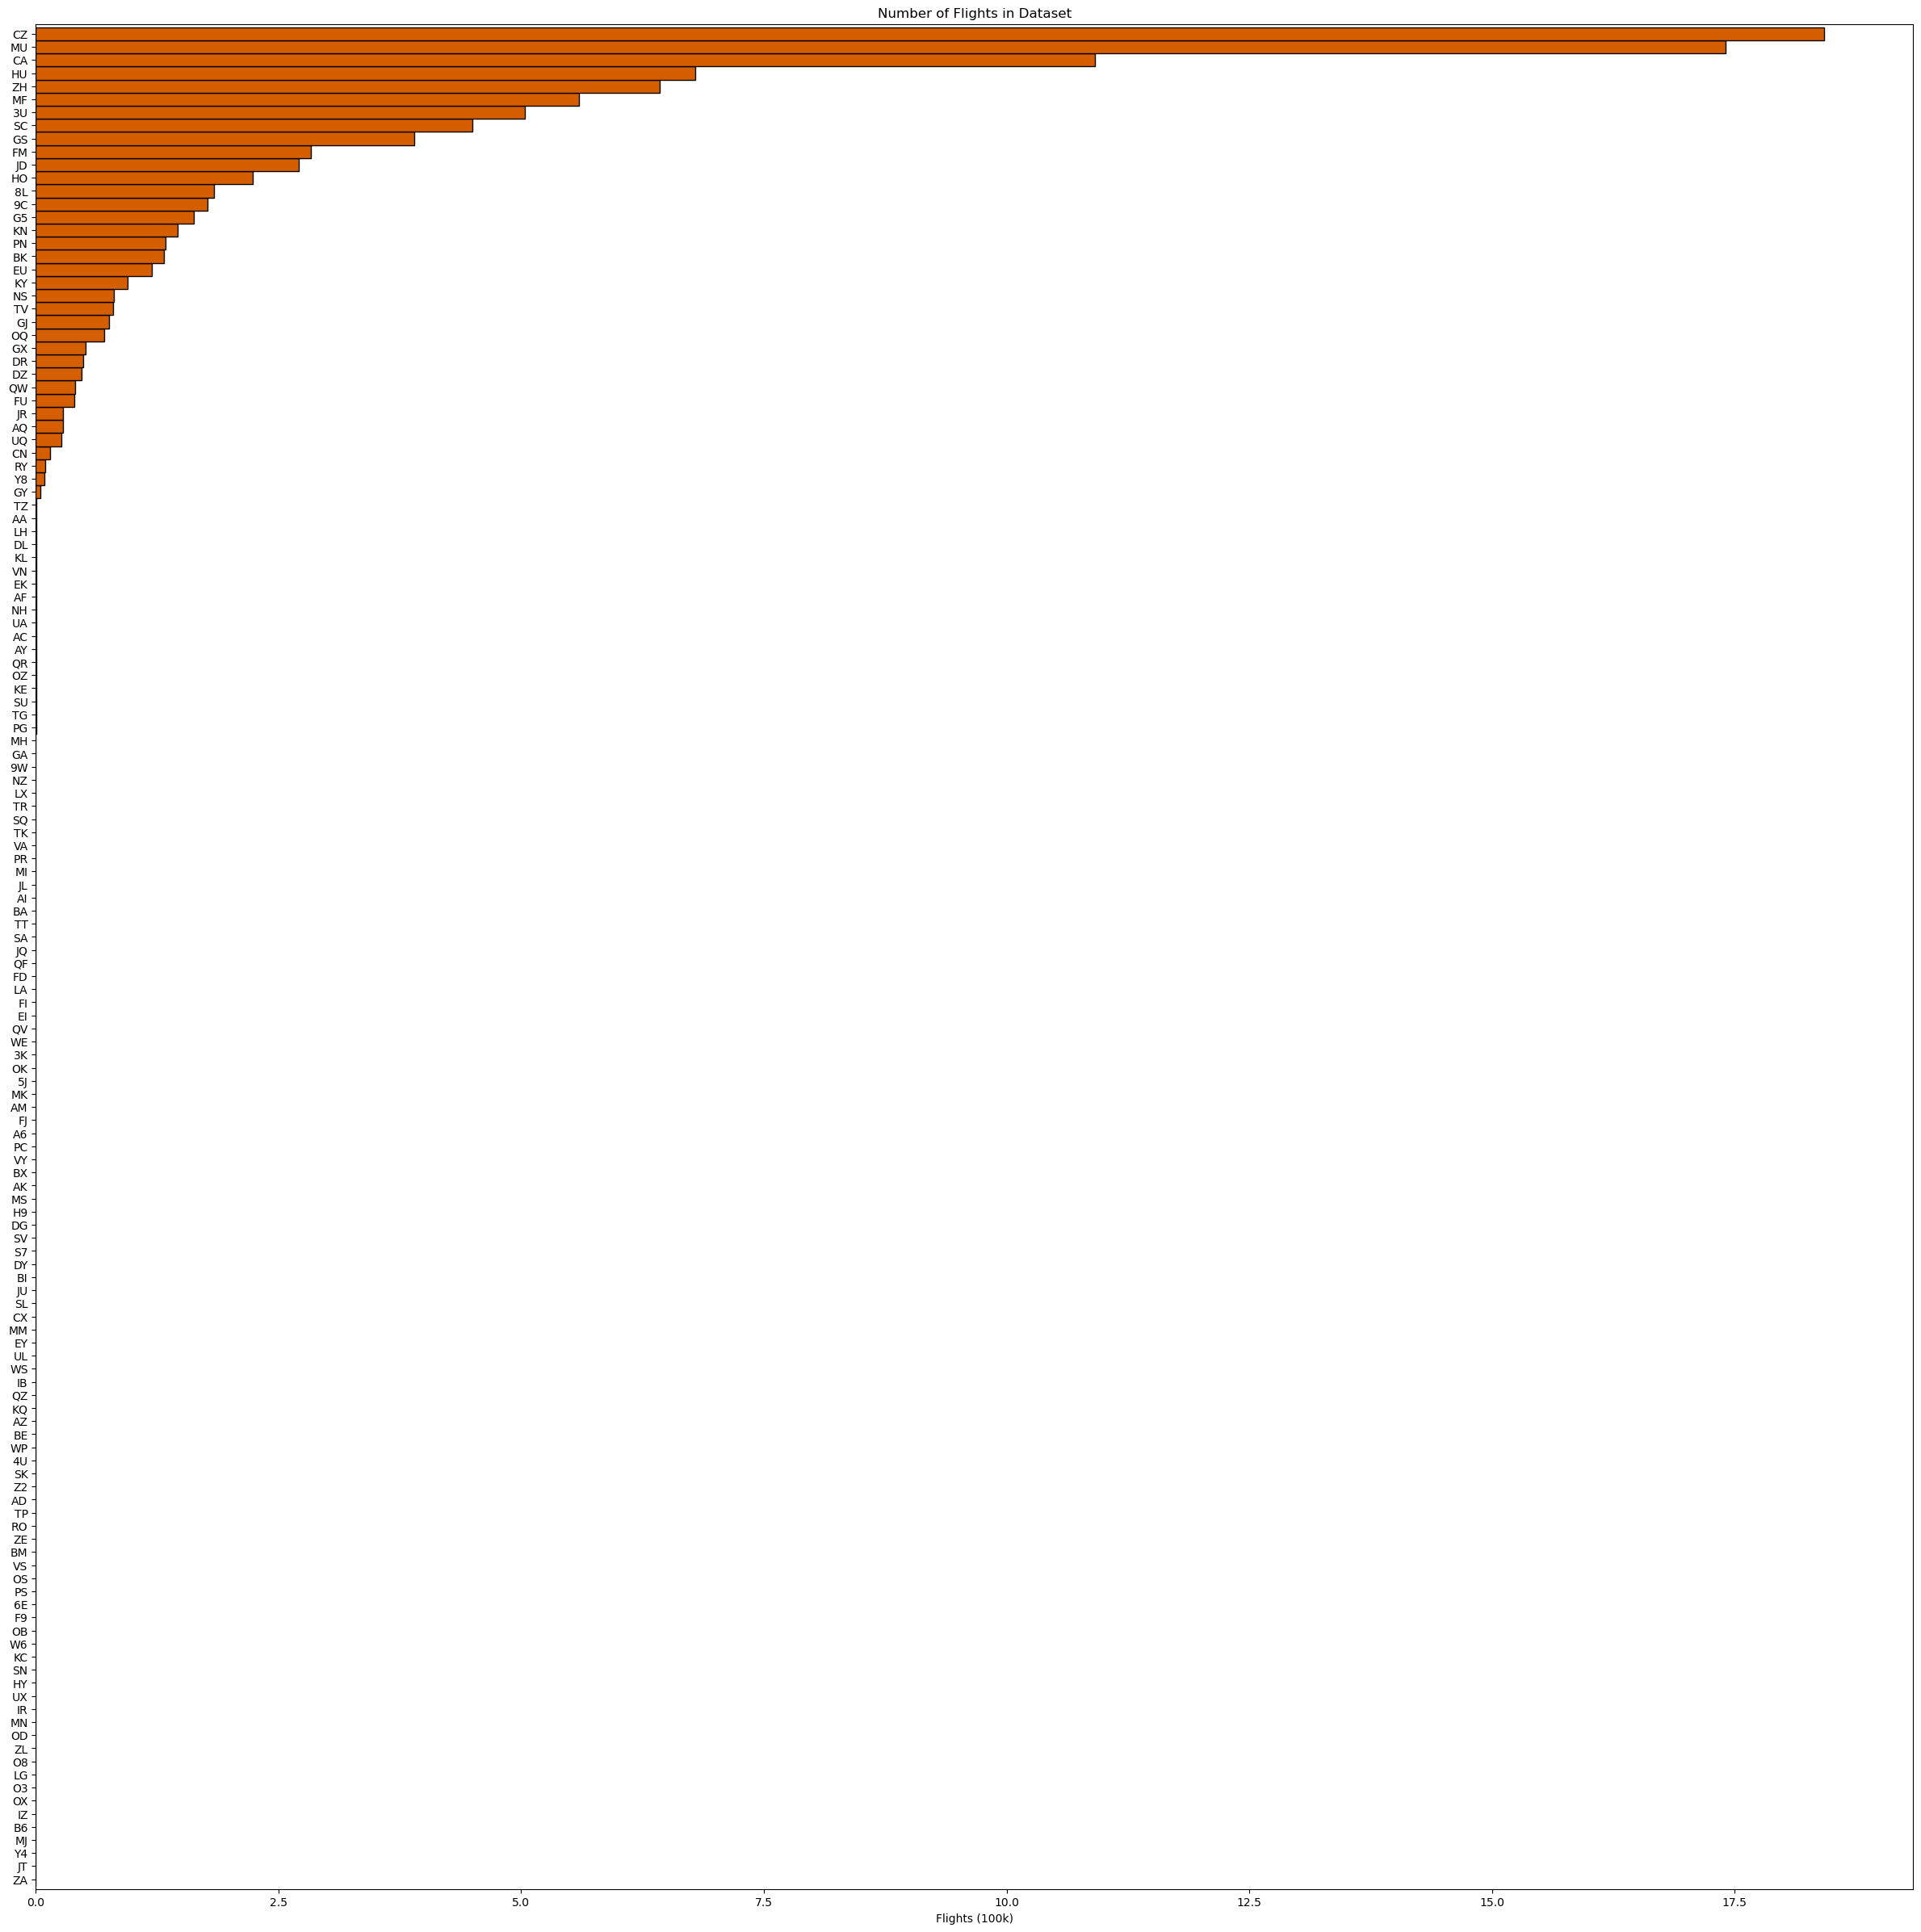

In [78]:
fig, ax = plt.subplots(figsize=(30, 30))
airlines_ordered = (df["AirlineCode"].value_counts(ascending=True) / 10_000).plot(
    kind="barh", ax=ax, color=pal[2], width=1, edgecolor="black"
)
ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (100k)")

Subset to the Top Airlines

In [69]:
top_airlines = (
    df["AirlineCode"]
    .value_counts()
    .reset_index()
    .query("AirlineCode > 50_000")["index"]
    .values.tolist()
)

df_top = df.loc[df["AirlineCode"].isin(top_airlines)].reset_index(drop=True).copy()
#print (df_top)

In [70]:
# Reset airline categories
df_top["AirlineCode"] = df_top["AirlineCode"].astype("str").astype("category")


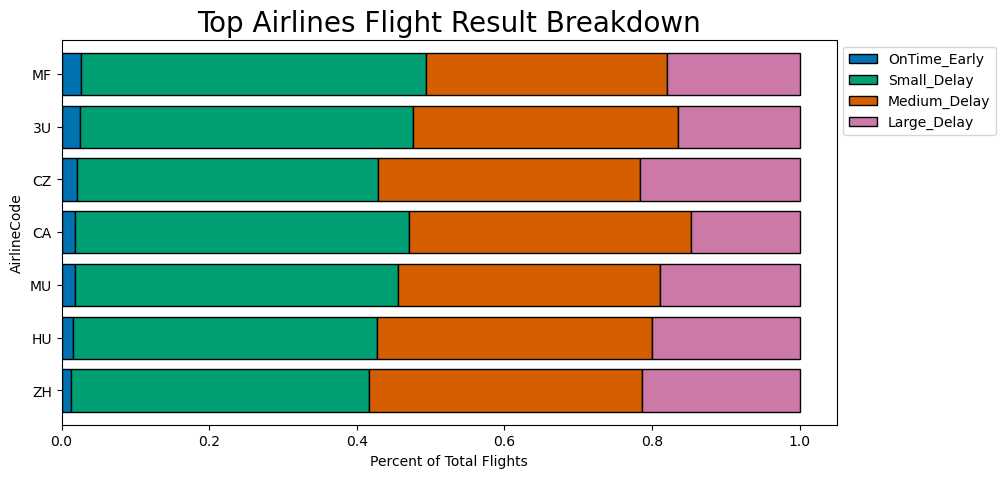

In [71]:
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay"]

df_agg = (
    df_top.groupby(["AirlineCode"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

Split out Each Delay Type and plot

In [73]:
delay_mapping = {
    "OnTime_Early": "Good",
    "Small_Delay": "Good",
    "Medium_Delay": "Bad",
    "Large_Delay": "Bad",
    "Cancelled": "Bad",
}

In [74]:
df_top["DelayOk"] = df_top["DelayGroup"].map(delay_mapping)

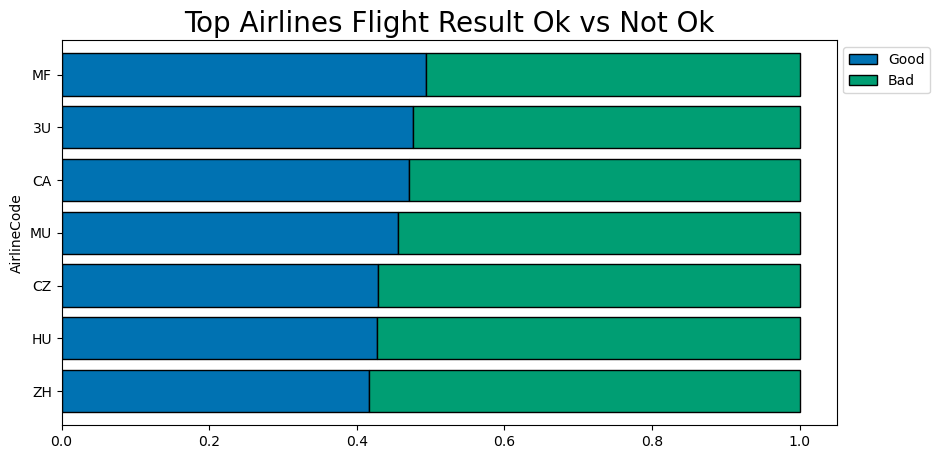

In [76]:
df_agg = (
    df_top.groupby(["AirlineCode"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("Good").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Ok vs Not Ok", fontsize=20)

plt.show()